#Emilia Romagna Flood Events 2023-2024

### Install Dependencies

In [1]:
!pip -q install cdsapi

# Other requirements:
!pip -q install cfgrib ecmwflibs
!pip -q install xarray netcdf4
!pip -q install matplotlib
!pip -q install cartopy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.0 MB/s eta 0:00:00


### Import Libraries

In [2]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

#### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (https://cds-beta.climate.copernicus.eu), then visit https://cds-beta.climate.copernicus.eu/how-to-api and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [ ]:
URL = 'https://cds-beta.climate.copernicus.eu/api'
KEY = '##################################'

In [3]:
URL = 'https://cds-beta.climate.copernicus.eu/api'

KEY = '690cd117-4742-45d1-95ed-8f83c5b2971a'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [4]:
DATADIR = './'

#evento 2024

In [8]:

import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["total_precipitation"],
    "year": "2024",
    "month": "09",
    "day": [
        "16", "17", "18",
        "19"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [44.46, 11.69, 43.88, 12.6]
}
client = cdsapi.Client(url=URL, key=KEY)
client.retrieve(dataset, request).download()

2024-09-30 21:53:59,264 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.processing:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-09-30 21:53:59,267 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative pa

b242bf87aaafbce41e6ff3f7b485729a.nc:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

'b242bf87aaafbce41e6ff3f7b485729a.nc'

In [9]:
p2024_precip = 'b242bf87aaafbce41e6ff3f7b485729a.nc'

p2024_precip_ds=xr.open_dataset(p2024_precip)
p2024_precip_ds

<xarray.Dataset> Size: 25kB
Dimensions:     (valid_time: 96, latitude: 6, longitude: 10)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 768B 2024-09-16 ... 2024-09-19T23...
  * latitude    (latitude) float64 48B 44.38 44.28 44.18 44.08 43.98 43.88
  * longitude   (longitude) float64 80B 11.69 11.79 11.89 ... 12.39 12.49 12.59
    expver      (valid_time) <U4 2kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 23kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-30T21:56 GRIB to CDM+CF via cfgrib-0.9.1...

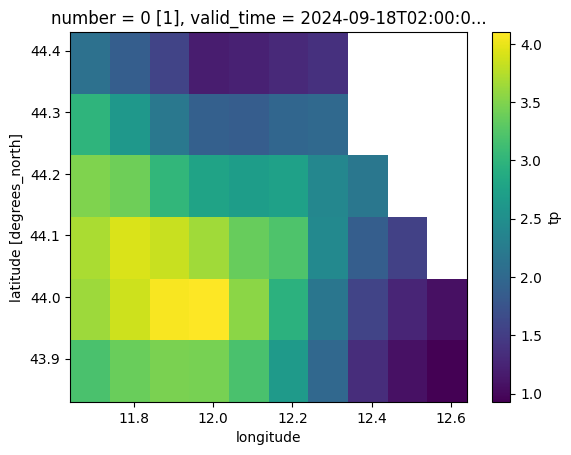

In [37]:
p2024_precip_ds_180 = p2024_precip_ds.assign_coords(longitude=(((p2024_precip_ds.longitude + 180) % 360) - 180)).sortby('longitude')
p2024_precip_da = p2024_precip_ds_180['tp']*1000
p2024_precip_da[50,:,:].plot()

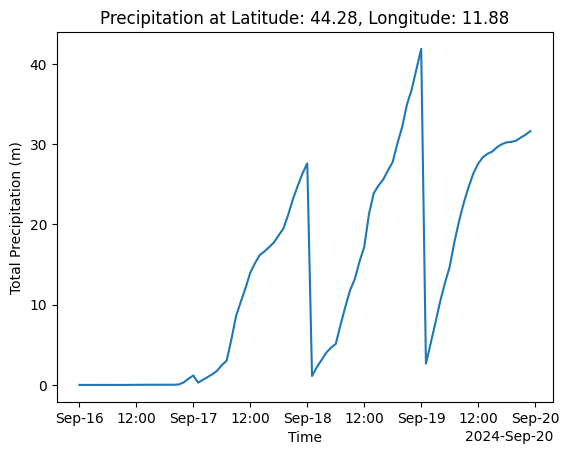

In [45]:
# Define the latitude and longitude of the location
latitude = 44.28
longitude = 11.88

# Extract the precipitation data for the location
location_data = p2024_precip_da.sel(latitude=latitude, longitude=longitude, method='nearest')

# Plot the precipitation data
location_data.plot()
plt.title(f'Precipitation at Latitude: {latitude}, Longitude: {longitude}')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
plt.show()